In [1]:
import random
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import ds2s_OV

In [2]:
L = 10.0
K = 30
n_0 = 5
x_0 = 0.1
v_0 = 0.7
dt = 1.0
dx = 1.0
x_init = np.array([(2 * i) / 10 for i in range(K)])
n_max = 10000

In [3]:
model = ds2s_OV.ds2s_OV(
	L=L,
	K=K,
	n_0=n_0,
	x_0=x_0,
	v_0=v_0,
	dt=dt,
	dx=dx,
	x_init=x_init,
	n_max=n_max
)

In [4]:
model.simulate()

In [5]:
x = np.array([[j for i in range(K)] for j in range(n_max + 1)]) \
    .flatten()
y = model.x[:, :K].flatten()

In [19]:
def plot_spatio_temporal(model, ni, nf):
	x = np.array([[j for i in range(K)] for j in range(ni, nf+1)]) \
		.flatten()
	y = model.x[ni:nf+1, :K].flatten()
	plt.figure(figsize=(6.4, 6.4))
	plt.title(
		"L={}, K={}, n0={}, x0={}, v0={}, dt={}, dx={}"
			.format(L, K, n_0, x_0, v_0, dt, dx)
	)
	plt.xlabel("Time")
	plt.ylabel("Location of Vehicles")
	plt.scatter(x, y, s=1)
	plt.show()

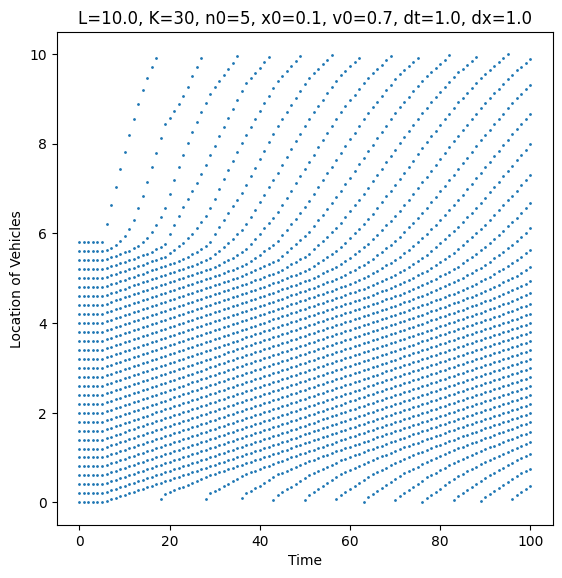

In [20]:
plot_spatio_temporal(model=model, ni=0, nf=100)

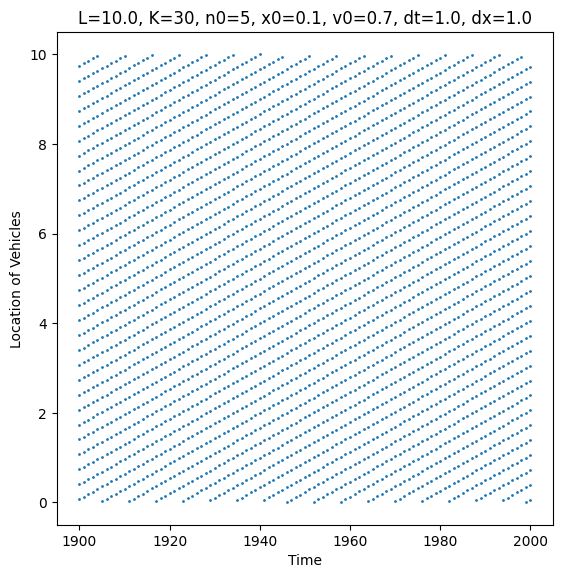

In [21]:
plot_spatio_temporal(model=model, ni=1900, nf=2000)

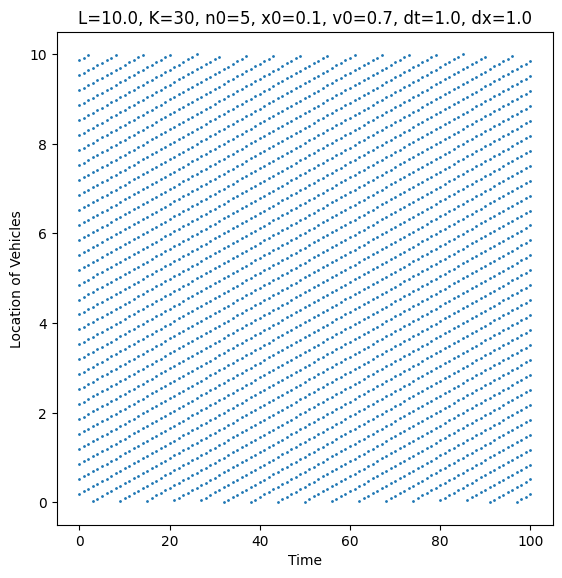

In [9]:
plot_spatio_temporal(model=model, ni=9900, nf=10000)

In [16]:
def plot_flow(model, ni, nf):
	x = np.array([i for i in range(nf - ni + 1)])
	y = np.array([model.flow(0, i) for i in range(ni, nf + 1)])
	plt.figure(figsize=(6.4, 6.4))
	plt.title(
		"L={}, K={}, n0={}, x0={}, v0={}, dt={}, dx={}"
			.format(L, K, n_0, x_0, v_0, dt, dx)
	)
	plt.xlabel("Time")
	plt.ylabel("Flow")
	plt.plot(x, y)
	plt.show()

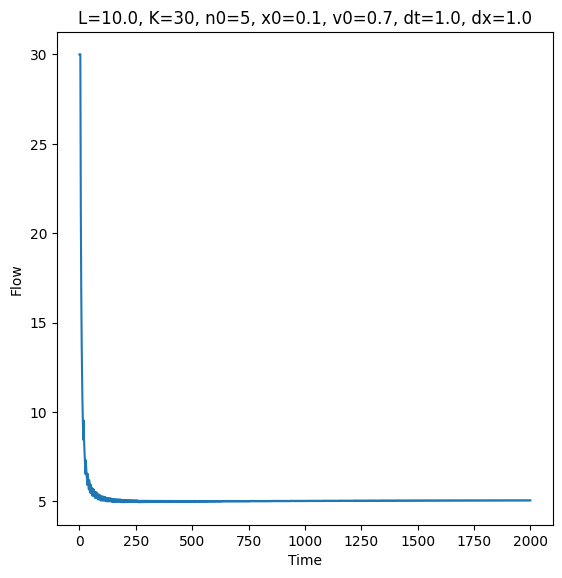

In [18]:
plot_flow(model=model, ni=0, nf=2000)

In [12]:
flows = np.array([model.flow(0, i) for i in range(0, n_max)])
flows[n_max-10:n_max]

array([5.07825138, 5.08066244, 5.08017098, 5.07967962, 5.07918836,
       5.0786972 , 5.07820614, 5.08061576, 5.0801246 , 5.07963354])

In [13]:
flows[1990:2000], flows[n_max-10:n_max]

(array([5.05094869, 5.04849819, 5.04605014, 5.04360455, 5.05569776,
        5.05324979, 5.05080427, 5.04836119, 5.04592057, 5.05798238]),
 array([5.07825138, 5.08066244, 5.08017098, 5.07967962, 5.07918836,
        5.0786972 , 5.07820614, 5.08061576, 5.0801246 , 5.07963354]))